In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Categorical variable 처리

In [52]:
df = pd.read_csv('/gdrive/My Drive/DS_contest/data1.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,No,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),Y_first6
0,0,0,0,354,3323,3298,15384,10746,0.583087,0.520701,0.202393,1,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,0,0,40.0,35.48,638.70,638.70,558.91,99580.58333
1,1,1,1,372,3073,3054,20167,10440,1.059932,0.402927,0.242269,6,4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,0,1,60.0,13.80,496.97,496.97,3715.35,82942.66667
2,2,2,2,383,3318,3291,18832,10745,1.913723,0.351151,0.274381,5,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,1,2,55.0,95.03,5131.40,0.00,5131.40,55833.66667
3,3,3,3,395,3220,3188,20243,10884,0.185481,0.231014,0.305237,5,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,1,3,55.0,49.90,3044.00,0.00,3044.00,95592.08333
4,4,4,4,397,3220,3189,19085,10916,0.432910,0.214301,0.306795,5,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,1,3,55.0,99.09,5351.00,0.00,5374.00,104730.33330


In [53]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)
df.head(5)

,No,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),Y_first6
0,354,3323,3298,15384,10746,0.583087,0.520701,0.202393,1,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,0,0,40.0,35.48,638.70,638.70,558.91,99580.58333
1,372,3073,3054,20167,10440,1.059932,0.402927,0.242269,6,4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,0,1,60.0,13.80,496.97,496.97,3715.35,82942.66667
2,383,3318,3291,18832,10745,1.913723,0.351151,0.274381,5,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,1,2,55.0,95.03,5131.40,0.00,5131.40,55833.66667
3,395,3220,3188,20243,10884,0.185481,0.231014,0.305237,5,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,1,3,55.0,49.90,3044.00,0.00,3044.00,95592.08333
4,397,3220,3189,19085,10916,0.432910,0.214301,0.306795,5,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,1,3,55.0,99.09,5351.00,0.00,5374.00,104730.33330


In [54]:
df.columns

Index(['No', 'Reference (KB) Elev. (ft)', 'Ground Elevation (ft)',
       'MD (All Wells) (ft)', 'TVD (ft)', 'Bot-Hole direction (N/S)/(E/W)',
       'Bot-Hole Easting (NAD83)', 'Bot-Hole Northing (NAD83)',
       'Stimulation Fluid', 'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)', 'Y_first6'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Reference (KB) Elev. (ft)', 'Ground Elevation (ft)',
       'MD (All Wells) (ft)', 'Avg Proppant Placed per Stage (tonne)', 
       'Stages Actual', 'Completed Length (m)', 'Avg Frac Spacing (m)', 
       'Load Fluid Rec (m3)', 'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)','Proppant Name 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)'],axis=1)
df.head(5)

,No,TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Proppant Composition,Proppant Size 1,Y_first6
0,354,10746,0.583087,0.520701,0.202393,1,1197.61,3214.70,178.59,0,40.0,99580.58333
1,372,10440,1.059932,0.402927,0.242269,6,4212.32,9727.20,270.20,0,60.0,82942.66667
2,383,10745,1.913723,0.351151,0.274381,5,5131.40,52997.80,981.44,1,55.0,55833.66667
3,395,10884,0.185481,0.231014,0.305237,5,3044.00,42791.76,701.50,1,55.0,95592.08333
4,397,10916,0.432910,0.214301,0.306795,5,5374.00,50769.92,940.18,1,55.0,104730.33330


In [55]:
df['SF_oil'] = (df['Stimulation Fluid']<=3)
df['SF_water'] = ((df['Stimulation Fluid']>3) & (df['Stimulation Fluid']<=12)) | (df['Stimulation Fluid']==19)
df['SF_slickwater'] = (df['Stimulation Fluid']>12)
df['PC_ceramic'] = (df['Proppant Composition']==0)
df['PC_sand'] = (df['Proppant Composition']==1)
df

,No,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),Y_first6,SF_oil,SF_water,SF_slickwater,PC_ceramic,PC_sand
0,354,3323,3298,15384,10746,0.583087,0.520701,0.202393,1,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,0,0,40.0,35.48,638.70,638.70,558.91,99580.58333,True,False,False,True,False
1,372,3073,3054,20167,10440,1.059932,0.402927,0.242269,6,4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,0,1,60.0,13.80,496.97,496.97,3715.35,82942.66667,False,True,False,True,False
2,383,3318,3291,18832,10745,1.913723,0.351151,0.274381,5,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,1,2,55.0,95.03,5131.40,0.00,5131.40,55833.66667,False,True,False,False,True
3,395,3220,3188,20243,10884,0.185481,0.231014,0.305237,5,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,1,3,55.0,49.90,3044.00,0.00,3044.00,95592.08333,False,True,False,False,True
4,397,3220,3189,19085,10916,0.432910,0.214301,0.306795,5,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,1,3,55.0,99.09,5351.00,0.00,5374.00,104730.33330,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,3048,3027,19462,10351,0.061657,0.368939,0.543000,5,6209.34,159.21,44935.30,1152.19,39,2652.60,67.20,4400.06,44689.46,16.94,2.34,1,3,55.0,159.21,6209.34,0.00,6209.34,43417.00000,False,True,False,False,True
276,716,3081,3057,20932,10036,0.839577,0.399107,0.587987,6,4802.42,160.08,8484.65,282.82,30,3127.69,106.22,1798.36,8480.50,2.71,1.54,1,2,55.0,160.08,4802.42,0.00,4802.42,46754.00000,False,True,False,False,True
277,718,3083,3057,20276,10112,0.342466,0.423411,0.546300,4,4395.30,122.09,15000.70,416.69,36,2902.23,81.84,142.32,15000.72,5.17,1.51,1,2,55.0,122.09,4395.30,0.00,4395.30,20921.00000,False,True,False,False,True
278,720,3036,3019,20728,10218,1.203390,0.411507,0.549215,4,4422.90,126.37,9565.00,273.29,35,2904.09,81.90,1195.02,9565.00,3.29,1.52,1,2,55.0,126.37,4422.90,0.00,4422.90,56508.16667,False,True,False,False,True


In [56]:
df = df.astype({'SF_oil':'int', 'SF_water':'int', 'SF_slickwater':'int', 'PC_ceramic':'int', 'PC_sand':'int'})
df

,No,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),Y_first6,SF_oil,SF_water,SF_slickwater,PC_ceramic,PC_sand
0,354,3323,3298,15384,10746,0.583087,0.520701,0.202393,1,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,0,0,40.0,35.48,638.70,638.70,558.91,99580.58333,1,0,0,1,0
1,372,3073,3054,20167,10440,1.059932,0.402927,0.242269,6,4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,0,1,60.0,13.80,496.97,496.97,3715.35,82942.66667,0,1,0,1,0
2,383,3318,3291,18832,10745,1.913723,0.351151,0.274381,5,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,1,2,55.0,95.03,5131.40,0.00,5131.40,55833.66667,0,1,0,0,1
3,395,3220,3188,20243,10884,0.185481,0.231014,0.305237,5,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,1,3,55.0,49.90,3044.00,0.00,3044.00,95592.08333,0,1,0,0,1
4,397,3220,3189,19085,10916,0.432910,0.214301,0.306795,5,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,1,3,55.0,99.09,5351.00,0.00,5374.00,104730.33330,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,3048,3027,19462,10351,0.061657,0.368939,0.543000,5,6209.34,159.21,44935.30,1152.19,39,2652.60,67.20,4400.06,44689.46,16.94,2.34,1,3,55.0,159.21,6209.34,0.00,6209.34,43417.00000,0,1,0,0,1
276,716,3081,3057,20932,10036,0.839577,0.399107,0.587987,6,4802.42,160.08,8484.65,282.82,30,3127.69,106.22,1798.36,8480.50,2.71,1.54,1,2,55.0,160.08,4802.42,0.00,4802.42,46754.00000,0,1,0,0,1
277,718,3083,3057,20276,10112,0.342466,0.423411,0.546300,4,4395.30,122.09,15000.70,416.69,36,2902.23,81.84,142.32,15000.72,5.17,1.51,1,2,55.0,122.09,4395.30,0.00,4395.30,20921.00000,0,1,0,0,1
278,720,3036,3019,20728,10218,1.203390,0.411507,0.549215,4,4422.90,126.37,9565.00,273.29,35,2904.09,81.90,1195.02,9565.00,3.29,1.52,1,2,55.0,126.37,4422.90,0.00,4422.90,56508.16667,0,1,0,0,1


In [57]:
df = df.drop(columns=['Stimulation Fluid','Proppant Composition', 'Proppant Name 1', 'Reference (KB) Elev. (ft)', 'Ground Elevation (ft)'],axis=1)
df.head(5)

,No,MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),Y_first6,SF_oil,SF_water,SF_slickwater,PC_ceramic,PC_sand
0,354,15384,10746,0.583087,0.520701,0.202393,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,40.0,35.48,638.70,638.70,558.91,99580.58333,1,0,0,1,0
1,372,20167,10440,1.059932,0.402927,0.242269,4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,60.0,13.80,496.97,496.97,3715.35,82942.66667,0,1,0,1,0
2,383,18832,10745,1.913723,0.351151,0.274381,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,55.0,95.03,5131.40,0.00,5131.40,55833.66667,0,1,0,0,1
3,395,20243,10884,0.185481,0.231014,0.305237,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,55.0,49.90,3044.00,0.00,3044.00,95592.08333,0,1,0,0,1
4,397,19085,10916,0.432910,0.214301,0.306795,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,55.0,99.09,5351.00,0.00,5374.00,104730.33330,0,1,0,0,1


In [58]:
df.to_csv('/gdrive/My Drive/DS_contest/Beforelasso.csv')

In [ ]:
df.to_csv('/gdrive/My Drive/DS_contest/Finaldata1.csv')

In [ ]:
df = pd.read_csv('/gdrive/My Drive/DS_contest/Finaldata1.csv')

In [49]:
df.head(5)

,Unnamed: 0,No,TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Total Proppant Placed (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Proppant Size 1,Y_first6,SF_oil,SF_water,SF_slickwater,PC_ceramic,PC_sand
0,0,354,10746,0.583087,0.520701,0.202393,1197.61,3214.70,178.59,40.0,99580.58333,1,0,0,1,0
1,1,372,10440,1.059932,0.402927,0.242269,4212.32,9727.20,270.20,60.0,82942.66667,0,1,0,1,0
2,2,383,10745,1.913723,0.351151,0.274381,5131.40,52997.80,981.44,55.0,55833.66667,0,1,0,0,1
3,3,395,10884,0.185481,0.231014,0.305237,3044.00,42791.76,701.50,55.0,95592.08333,0,1,0,0,1
4,4,397,10916,0.432910,0.214301,0.306795,5374.00,50769.92,940.18,55.0,104730.33330,0,1,0,0,1


Linear Regression

In [ ]:
x = df.drop(columns=['Y_first6','No'],axis=1)
y = df['Y_first6']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(x_test)
y_pred

array([ 70580.42633802, 106157.20339296,  72226.83750708,  98546.64543071,
        80073.71662637,  70319.06262909, 125838.17542774, 119765.12391994,
        56226.75725999, 106268.42727131, 116765.8611104 ,  88815.08384299,
        30859.17124188,  69052.67633577,  91941.87767238, 119200.87090803,
        76146.40695656,  54472.08979685, 121510.24647133,  76825.34497356,
        64657.52246806,  55795.34511136, 117816.96752575,  68666.76952967,
        54206.5177046 ,  71780.44483929, 109216.0082679 ,  60770.719894  ,
        86474.39880694,  62970.44362792,  89724.66760654,  59572.98761868,
        35874.36923157,  59030.7553088 , 112480.69557101,  83453.20226511,
        68047.69438428, 102919.7263227 ,  65573.74575435,  42854.20123296,
        88604.47071737,  91626.37052276,  42939.79982137,  93513.6443008 ,
       102969.90002055,  53274.83065766,  70355.24992435,  80899.98970484,
       105031.93229956,  63875.12167556, 114000.45290846, 144127.9556613 ,
       132252.58061126,  

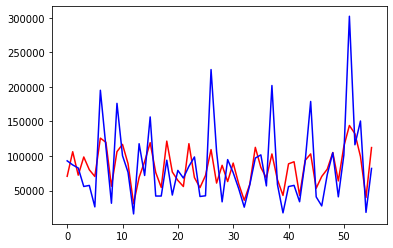

In [47]:
#plot 해보기
index_list = np.arange(len(y_pred))
plt.plot(index_list, y_pred, '-', c='r', label = 'predict')
plt.plot(index_list, y_test, '-', c='b', label = 'real')

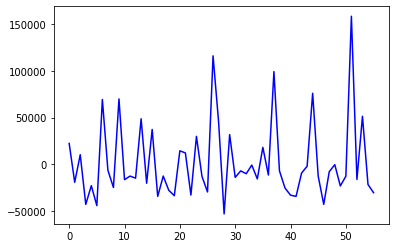

In [51]:
plt.plot(index_list, y_test - y_pred, '-', c='b', label = 'real')

sMAPE 계산

In [ ]:
def sMAPE(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [42]:
print(sMAPE(y_pred,y_test))

36.604915718043564


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
import sklearn

In [ ]:
scores = cross_val_score(LR, x, y, scoring = 'explained_variance', cv=5)
print('cross-val-score: {}'.format(scores))
print('cross-val-score.mean: {:.3f}'.format(scores.mean()))

cross-val-score: [-0.45124633  0.36918357  0.26656419  0.10446338  0.21565613]
cross-val-score.mean: 0.101


In [ ]:
scores = cross_val_score(LR, x, y, scoring = 'r2', cv=5)
print('cross-val-score: {}'.format(scores))
print('cross-val-score.mean: {:.3f}'.format(scores.mean()))

cross-val-score: [-0.57759094  0.22009854  0.21207757 -0.04369657 -0.27714063]
cross-val-score.mean: -0.093


In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we